<style type="text/css">
div.text_cell_render h1 {  
    font-size: 24pt; }

div.text_cell_render h2 {  
    font-size: 18pt; }

div.text_cell_render h3 {  
    font-size: 14pt; }

.rendered_html pre,
.rendered_html code {
    font-size: medium; }

.rendered_html ol {
    list-style:decimal;
    margin: 1em 2em; }    
    
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top} </style>

<table class="tg" align="right">
  <tr>
    <th class="tg-0pky"> <b>Author:</b> </th>
    <th class="tg-0pky"> Cesare Pio Iurlaro <br> (<a href="cesareiurlaro@gmail.com">cesareiurlaro@gmail.com</a>)  </th>
  </tr>
  <tr>
    <th class="tg-0pky"> <b>URLs:</b> </th>
    <th class="tg-0pky"> - <a href="https://github.com/CesareIurlaro">GitHub.com </a> <br>
                         - <a href="https://www.linkedin.com/in/cesare-iurlaro">Linkedin.com </a></th></tr>
</table> 

<hr>

# Elementi di elaborazione automatica del linguaggio naturale <br> Esercizio #2 [2018/2019]

<hr>

## 1. Traccia 
L'esercizio consiste nell'implementazione di un semplice **traduttore transfer** **IT $\rightarrow$ IT**-**YO**, ovvero di un _sistema di traduzione_ che prenda in _input_ una frase scritta in italiano e che restituisca in _output_ la corrispondente traduzione in 'italiano-yoda', lingua fittizia parlata nell'universo cinematografico della saga di Guerre Stellari.


La **parsificazione** è vincolata all'utilizzo dell'**_algoritmo CKY_**, algoritmo per _grammatiche fuori dal contesto_ (_CFG_) che sfrutta il metodo di **_programmazione dinamica_** e una strategia **_bottom-up_** per svolgere il _task_ con una _complessità nel caso peggiore_ di $\mathcal{O}\left(n^{3} \cdot|G|\right)$, dove $n$ è la _lunghezza_ della stringa da parsificare e $|G|$ la cardinalità della grammatica $G$.

Di seguito sono elencati alcuni esempi di traduzioni che ci si aspetta che il traduttore sia in grado di eseguire correttamente:


<table class="tg">
  <tr>
    <th class="tg-0pky"></th>
    <th class="tg-0pky"><b>Input</b></th>
    <th class="tg-0pky"><b>Output atteso</b></th>
  </tr>
  <tr>
    <th class="tg-0pky">$(a)$</th>
    <th class="tg-0pky">Tu avrai novecento anni di età</th>
    <th class="tg-0pky">Novecento anni di età tu avrai</th>
  </tr>
  <tr>
    <th class="tg-0pky">$(b)$</th>
    <th class="tg-0pky">Tu hai amici lì</th>
    <th class="tg-0pky">Amici hai tu lì</th>
  </tr>
  <tr>
    <th class="tg-0pky">$(c)$</th>
    <th class="tg-0pky">Noi siamo illuminati</th>
    <th class="tg-0pky">Illuminati noi siamo</th>
  </tr>
  <tr>
    <th class="tg-0pky">$(d)$</th>
    <th class="tg-0pky">Tu hai molto molto da apprendere ancora</th>
    <th class="tg-0pky">Molto da apprendere ancora tu hai</th>
  </tr>
  <tr>
    <th class="tg-0pky">$(e)$</th>
    <th class="tg-0pky">Il futuro di questo ragazzo è nebuloso</th>
    <th class="tg-0pky">Nebuloso il futuro di questo ragazzo è</th>
  </tr>
  <tr>
    <th class="tg-0pky">$(f)$</th>
    <th class="tg-0pky">Skywalker corre veloce</th>
    <th class="tg-0pky">Veloce Skywalker corre</th>
  </tr>
    
</table>

### 1.1 Osservazioni preliminari

#### 1.1.1 Schemi linguistici di Yoda
Yoda è un personaggio immaginario della saga fantascientifica di Guerre stellari. 
I suoi **caratteristici schemi linguistici** sono stati oggetto di discussione in tipologia linguistica; gli accademici sintattici li hanno infatti associati ad un **ordine di sintassi realmente adottato da alcuni linguaggi naturali: l'ordine Oggetto-Soggetto-Verbo** (**OSV**).

Quest'ultimo viene anche detto **XSV**, dove **X** rappresenta un qualsivoglia complemento, eventualmente anche non oggetto, che si coordini appropriatamente con il verbo.
<hr>
> $A$ $long$ $time$ $ago,$ $in$ $a$ $galaxy$ $far$ $far$ $away$ $...$ 
> ![Alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTLYrmOHFvYMRgYBpwMyVffZHZ0Os33YNoxEiR9rzKDDuRNyYQY)

Esempi di altre lingue che fanno uso di questo ordine sono le lingue _haida_ e _kotava_.

#### 1.1.2 Regole per la traduzione
Sebbene associato ad un _ordine OSV_, il linguaggio usato da Yoda **non ha un comportamento sempre riconducibile a uno schema fisso**. Ciò significa che una regola di traduzione potrebbe essere corretta per una o più sue citazioni, ma anche che potrebbe non esserlo per altre aventi la stessa struttura sintattica.

È possibile constatare questa irregolarità anche tramite l'**osservazione degli esempi**:
1. L'**anteposizione degli aggettivi e dei sintagmi aggettivali** avviene negli esempi in cui compaiono $(a)$ $(d)$ $(e)$ $(f)$
2. L'**anteposizione dei sintagmi avverbiali** invece avviene sono nell'esempio $(d)$ e non in $(b)$
2. L'**inversione di pronome e verbo** è infine presente solo nell'esempio $(b)$

Ciò è stato tenuto presente durante la _fase di progettazione_.

## 2. Realizzazione

### 2.1 Requisiti:
1. **Acquisizione di una grammatica** sufficientemente espressiva da coprire almeno il dominio di esempi precedentemente enumerati
2. **Implementazione** di **CKY** che generi alberi sintattici avvalendosi di meccanismi di backtracing
3. Manipolazione efficiente dei dati al fine di ottenere una **traduzione accurata dell'_input_**

### 2.2 Grammatica
Nella scrittura della grammatica sono state catturate solamente alcune tra le più significative **strutture** della lingua italiana . 

#### Sintagmi (regole grammaticali) modellati:
- Sintagmi _nominali_ (**NP**)
- Sintagmi _verbali_ (**VP**)
- Sintagmi _aggettivali_ (**ADJP**)
- Sintagmi _avverbiali_ (**ADVP**)
- Sintagmi _preposizionali_ (**PP**)

#### Unità sintattiche modellate:
- _Pronomi personali_ e _nomi propri_ (**NP**)
- _Nomi_ non propri (**NOUN**)
- _Pronomi_ non personali (**PRON**)
- _Verbi_ non usati come ausiliari (**VERB**)
- _Verbi_ usati come _ausiliari_ (**AUX**)
- _Verbi_ composti usati con un _ausiliare_ (**VBN**)
- _Articoli_ (**DET**)
- _Avverbi_ (**ADV**)
- _Preposizioni_ (**ADP**)
- _Aggettivi_ (**ADV**)

### 2.3 Architettura

#### Piattaforma
**_Nltk_** è una _suite di librerie_ che mette a disposizione classi e metodi per la gestione di alberi sintattici e grammatiche.

Scritta in in **_python_**, è il punto di riferimento per l'elaborazione del linguaggio naturale _open source_ e si è perciò dimostrata una **solida scelta**.

#### Moduli:
- `_init_`, responsabile dell'inizializzazione dei **dati di configurazione**:    
    
    - `data_folder` e `data_file` sono i **riferimenti sul filesystem** rispettivamente alla _cartella delle grammatiche_ e ad una _specifica grammatica_
    -  `sentences` è una lista di **stringhe di _input_** (_frasi_) da sottoporre al traduttore
    -  `translation_rules`  è la lista di `Nonterminal`; **il traduttore la utilizza per trasformare l'albero sintattico** in fase di traduzione
    
    
- `_logic_`, resposabile della _logica applicativa._ 

    - Composto da due funzioni, `cky_parsing` e `translate`, **determina le funzionalità dell'applicazione** eseguendo elaborazioni dettagliate.
    

- `_main_`, responsabile dell'**avvio del programma**; richiama entrambi i moduli precedentemente descritti.

<hr>



#### 2.3.1 Descrizione di `cky_parsing`
Implementa l'**algoritmo di parsificazione CKY**.
- _input_: lista di parole `words`, Context-Free-Grammar `grammar` e parametro opzionale booleano `draw `.
- _output_: albero sintattico le cui foglie sono componenti di `words` e il cui nodo padre è il POS tag che l'algoritmo ha associato loro
<table class="tg" align="left">
<tr> <th class="tg-0pky"> Il <b><i>POS tag</i></b> è il mezzo con cui è possibile effettuare elaborazione del linguaggio naturale. <br> Consiste in una sequenza di caratteri che <b>identifica</b> un insieme elementi sintattici simili tra loro, e <b>distingue</b> quelli che invece non lo sono. </th> </tr> </table>

L'algoritmo costruisce una **matrice `table`**, di tipo `ndarray`. Ciascuna **componente** di tale matrice è una **lista di alberi sintattici** potenzialmente vuota. La presenza di **un albero sintattico certifica la corrispondenza tra una produzione della grammatica e la frase di input**.

Questa implementazione **determina se una sequenza di parole $S$ è coperta da una grammatica $G$**:

- se la **componente** di `table` **$[0,\ n-1]$** è una **lista vuota**, allora vuol dire che **non esiste un albero sintattico** di $S$ in accordo a $G$.
 <br> In tal caso l'**algoritmo restituisce un albero la cui radice presenta l'etichetta "`Grammar error`"**.


- se altrimenti tale **componente** è una **lista non vuota**, allora vuol dire che $G$ copre $S$ ed inoltre
    - se contiene **un solo elemento**, l'**interpretazione** di $S$ è **univoca**
    - se viceversa contiene **più di un elemento**, vi sono più interpretazioni di $S$ e quindi vi è **ambiguità**
  <br> 
  
  In tal caso l'**algoritmo restituisce il primo albero** presente nella lista, ignorando così l'ambiguità. <br> Se `draw` ha valore **True**, allora tale albero viene anche disegnato a schermo.

In [ ]:
def cky_parsing(words: list, grammar: CFG, draw=False):
        n = len(words) + 1
        table = numpy.ndarray(shape=(n,n), dtype=set)

        for j in range(1, n):                                                           
            table[j-1, j] = list(map(lambda rule: Tree(rule.lhs(), [words[j-1]]),      
                                list(filter(lambda production: len(production.rhs()) == 1
                                                                  and production.rhs()[0] == words[j-1],
                                                               grammar.productions()))))

            for i in reversed(range(0, j-1)):
                for k in range(i+1, j):                         
                    rule = list(map(lambda rule: Tree(rule.lhs(), [table[i, k][0], table[k, j][0]]),
                        list(filter(lambda production: len(production.rhs()) == 2
                           and table[i, k] is not None and production.rhs()[0] in map(lambda head: head.label(), table[i, k])
                           and table[k, j] is not None and production.rhs()[1] in map(lambda head: head.label(), table[k, j]),
                        grammar.productions()))))
                    table[i, j] = rule if table[i, j] is None else rule + table[i, j]
                    
        if draw: table[0, n - 1][0].draw()
        return table[0, n-1][0] if len(table[0, n-1]) != 0 else Tree("Grammar error", []) 

<hr>

#### 2.3.2 Descrizione di `translate`
Implementazione della **fase di traduzione** del programma.
- _input_: albero sintattico `tree` della frase da tradurre, lista di non terminali `translation_rules` e parametro opzionale booleano `draw `.
- _output_: manipolazione dell'albero `tree` di partenza; rappresenta la traduzione effettuata

Questa funzione effettua in `tree` una **ricerca in profondità in preordine** di un oggetto di classe `Nonterminal` (POS tag o sintagma che sia) presente nella lista `translation_rules`. Se la ricerca ha successo, **antepone tale oggetto al resto della frase**.

 Se `draw` ha valore **True**, allora l'albero così manipolato viene anche disegnato a schermo.
 La **funzione restituisce l'albero manipolato**, ovvero quello su cui è stata effettuata la traduzione e la cui radice presenta l'etichetta "`Translation`".

In [ ]:
def translate(tree: Tree, translation_rules: list, draw=False):
    put_back = list(filter(lambda i: isinstance(tree[i], Tree)
                                          and tree[i].label() in translation_rules
                                          and not 'put_back' in locals(),
                                tree.treepositions()))[0] if len(tree) != 0 else []

    if len(put_back) != 0:
        prefix = tree.__getitem__(put_back)
        tree.__delitem__(put_back)
        tree = Tree(Nonterminal('Translation'), [prefix, tree[0], tree[1]])
        if draw: tree.draw()

    return tree

## 3. Conclusione

### 3.1 Considerazioni

Il programma si comporta bene nella maggior parte dei casi, ma non in tutti.

Le incongruenze presenti all'interno delle citazioni stesse non permettono infatti di stabilire delle regole di traduzione generali al punto che il traduttore si comporti bene per tutti i possibili _input_.

Con riferimento agli esempi, il traduttore ottiene sempre l'esatto **output atteso**, tranne che per l'esempio $(b)$; che però, come osservato precedentemente, si comporta in modo anomalo per ben 2 delle 3 regole catturate per la traduzione nel linguaggio di Yoda e pertanto richiederebbe delle _regole ad hoc_.

A supporto del fatto che sia un caso specifico problematico da generalizzare, riporto di seguito la traduzione del <a href="http://www.yodaspeak.co.uk/index.php">Yoda speak generator</a>: <br>

<p align="center"><img src="https://i.ibb.co/dtpL47B/yoda.png"/></p>

La quale **coincide esattamente** con quella ottenuta tramite il sistema realizzato, riportata nel paragrafo successivo.

### 3.2 Esempi di traduzione

<p><b>Input</b></p> | <p><b>Output reale</b></p>
- | - 
<img src="https://i.ibb.co/N9rrNQG/yoda.png"/> | <img src="https://i.ibb.co/F7Hw4VS/yoda.png"/>
<img src="https://i.ibb.co/gD5Cw1p/yoda.png"/> | <img src="https://i.ibb.co/VMcb6gc/yoda.png"/>
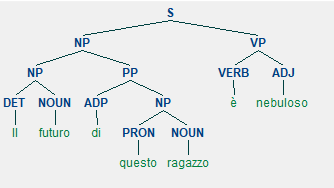
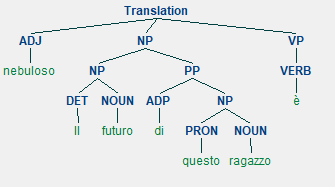